In [322]:
import numpy as np
import pandas as pd

### 2. Let us study the implementation of PCA under the scikit-learn.

In [2]:
#Installation of scikit-learn 

pip install -U scikit-learn

     |████████████████████████████████| 12.1 MB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 302 kB 9.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


#### We are going to implement the PCA of the Iris dataset here

In [383]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

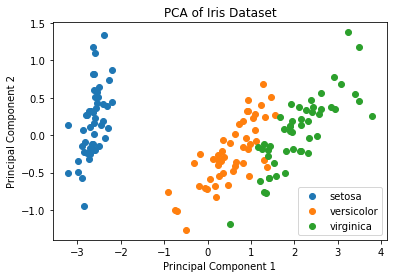

In [384]:
# Loading of the dataset 
data = load_iris()
X = data.data
y = data.target

# Apply PCA with two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)  # To fit and transform the data(compute the PCA and applies the dimensionality reduction)

for i in range(len(data.target_names)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=data.target_names[i])

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#### 3. The data have been upload directly on the site using the link you provide us. So, here we are not going to import the data using  an URL

### 4. Upload the the dataset into a matrix A

In [385]:
# Read the data first

data='golub.csv'
df = pd.read_csv(data)

# Uploading into A

A=df.values
A

array([[39, 'BM', 'F', ..., -526.4492185893072, -268.96392361976007,
        -779.6430919760287],
       [40, 'BM', 'F', ..., -671.9112088490682, -671.9112088490682,
        -644.2725769000689],
       [42, 'BM', 'F', ..., -714.8596835849695, 3672.066149087798,
        -822.0212306426248],
       ...,
       [31, 'BM', nan, ..., -758.8298902647057, -407.9147313711989,
        -772.0719717323849],
       [32, 'BM', nan, ..., -769.8094961108546, -205.6277092450704,
        -861.2984345215223],
       [33, 'BM', nan, ..., -937.506736866882, 760.4336513947948,
        -933.2724715594964]], dtype=object)

### 5. Determine the number of rows and columns of the matrix A.

In [326]:
print("The numbers of rows and columns of the matrix A are respectively: ",A.shape[0],"and",A.shape[1])

The numbers of rows and columns of the matrix A are respectively:  72 and 7135


### 6.  Rank of the sample covariance matrix

In [398]:
# First we determine the covariance matrix Sigma 

num_variables = df.select_dtypes(include=['float64'])    #Here, we are selecting only expression datas

# Compute the mean and the standard deviation to standardize the data
mean_vals = np.mean(num_variables, axis=0)
std_devs = np.std(num_variables, axis=0)
standardized_data = (num_variables - mean_vals) / std_devs

# Compute the covariance matrix
Sigma = np.cov(standardized_data, rowvar=False)

#Sigma.shape


print("The rank of the covariance matrix Sigma is: ",np.linalg.matrix_rank(Sigma))
print("Sigma=",Sigma)

The rank of the covariance matrix Sigma is:  71
Sigma= [[1.01408451 0.5983628  0.44501241 ... 0.52216563 0.33959608 0.63701652]
 [0.5983628  1.01408451 0.45455838 ... 0.5254418  0.2233346  0.59087231]
 [0.44501241 0.45455838 1.01408451 ... 0.28572715 0.13081942 0.47219009]
 ...
 [0.52216563 0.5254418  0.28572715 ... 1.01408451 0.218887   0.79730401]
 [0.33959608 0.2233346  0.13081942 ... 0.218887   1.01408451 0.1944029 ]
 [0.63701652 0.59087231 0.47219009 ... 0.79730401 0.1944029  1.01408451]]


### 7. Determine the principal components of the dataset.

In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [400]:
scaling=StandardScaler()
 
# Use fit and transform method

scaling.fit(standardized_data)
Scaled_data=scaling.transform(standardized_data)
 

principal=PCA(n_components=4)
principal.fit(standardized_data)
x=principal.transform(standardized_data)
#x

In [402]:
import numpy as np

eigenvalues, eigenvectors = np.linalg.eig(Sigma)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

k = 2  # Choose the number of principal components
principal_components = eigenvectors_sorted[:, :k]

print("the principal components are: ", principal_components)

the principal components are:  [[ 0.01654593+0.j  0.00963044+0.j]
 [ 0.01546001+0.j  0.01226754+0.j]
 [ 0.01344495+0.j  0.00407046+0.j]
 ...
 [ 0.02086726+0.j -0.00186798+0.j]
 [ 0.00529976+0.j -0.00236946+0.j]
 [ 0.02230291+0.j  0.00064603+0.j]]


### 8. Eigenvalues of the sample covariance matrix Sigma

In [403]:
print("The eigenvalues of the sample covariance matrix are: ", eigenvalues)

The eigenvalues of the sample covariance matrix are:  [ 1.63158552e+03+0.00000000e+00j  8.42595137e+02+0.00000000e+00j
  3.91075830e+02+0.00000000e+00j ...  1.16745365e-16+0.00000000e+00j
 -2.39651135e-16+1.04013278e-16j -2.39651135e-16-1.04013278e-16j]
